### Table of Contents
1 [DEFINE](#definition)

1.1 [BUSINESS PROBLEM](#problem)

2 [DISCOVER](#discover)

2.1 [Loading](#loadthefile)

2.2 [Exploring the data](#etl)

2.3 [Visualisations using pandas,seaborn](#Visualise)

2.4 [Feature Engineering](#Engineer)

2.5 [Preprocessing dataset for model creation](#preprocess)

2.5.1 [Creation of dummy variables](#dummies)

3 [DEVELOP](#BaselineModel)

3.1 [ModelDevelopment](#development)

3.2 [ModelTuning](#tuning)

3.3 [ModelEvaluation](#evaluate)

4 [DEPLOY](#deploy)



### 1: DEFINE
<a id="definition"></a>

**Classifying Iris flowers into three species, by creatig a calssification model that learns from the historical Iris species data. In addition, we will identify the correlation of flower species with the different variables like sepalLength, sepalwidth,  and bring out actionable insights from the existing dataset.**

*STATING THE ASSUMPTIONS:*


*The data is a reflection of Iris flower dataset collated a few years ago and it is assumed that it is a reflection of the existent Iris flower species. We do not take into account the dependance of Iris flower species on the location or demography.*




### 1.1 BUSINESS PROBLEM
<a id="problem"></a>

**Classify iris plants into three species in this classic dataset.**


*It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.*

The columns in this dataset are:

1 *Id*

2 *SepalLengthCm*

3 *SepalWidthCm*

4 *PetalLengthCm*

5 *PetalWidthCm*

6 *Species*

### 2: DISCOVER
<a id="discover"></a>

*LAYING DOWN THE GROUNDWORK*

- What are we analyzing?

**In the first step, we will be analyzing the correlation between the different variables of the dataset and write down the inferences. These variables include SepalLength, SepalWidth, PetalLength and PetalWidth.**

- What our variables mean?

**The different variables signify the different attributes a flower can have.**

- Why are we analyzing this data set?

**To develop a working classification model that can be deployed and used to predict the species of a new flower on the basis of its basic features and thus aid in the flower classification process.**

### 2.1 Loading the data
<a id="loadthefile"></a>

In [97]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#A Function to load a csv from the local computer
def loadfile(file):
    return  pd.read_csv(file)
dataset=loadfile('C:/Users/ishan/Documents/Python Scripts/DSDJ/3rd Portfolio Project/iris-species/Prepared/Iris.csv')

In [99]:
#A Function that uses pandas methods to show headers, column names and the shape of the matrix
def heading(df):
    fewlines=df.head()
    matrix=df.columns
    cols=df.shape
    return matrix,fewlines,cols

In [100]:
#Calling the function
heading(dataset)

(Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object'),
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
 0   1            5.1           3.5            1.4           0.2  Iris-setosa
 1   2            4.9           3.0            1.4           0.2  Iris-setosa
 2   3            4.7           3.2            1.3           0.2  Iris-setosa
 3   4            4.6           3.1            1.5           0.2  Iris-setosa
 4   5            5.0           3.6            1.4           0.2  Iris-setosa,
 (150, 6))

In [101]:
#Dropping the 'Id' Column to make the dataset cleaner and ready for analysis.
dataset=dataset.drop(['Id'],axis=1)

**EXPLAINING OUR FINDINGS FOR THE 'LOADING' PART OF THE ANALYSIS.**

*a) What analyses we’ve done on the data:*

**Till now, we have created a basis function that loads a csv, using which we have loaded the Iris data file. In addition, we have created a function called heading that can be used to have a look at the first few rows, column names and the shape of the matrix.**

*b) Why we did these analysis:*

**It is important to understand the baselines of the dataset from the beginning. For instance, everytime we get a dataset to explore, it is necessary to perform a basic quality assurance and be aware of the number of rows and dataset.**

### 2.2 Exploring the Data
<a id="etl"></a>

In [102]:
def descriptivestats(df):
    information=df.info()
    description=df.describe()
    return description

In [103]:
descriptivestats(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [104]:
#Check for Dupliates and Nulls
def nulls(df):
    return df.isnull()

In [105]:
# Calling the function
nulls(dataset)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


**EXPLAINING OUR FINDINGS FOR THE SECTION 2.2:**

*a) What analyses we’ve done on the data:*

**Till now, we have inspected the dataset and created two basic functions, used for descriptive statistics and identfication of nulls and duplicates. The descriptive statistics include the mean, max, standard deviation and the the percentiles for each of the columns of the dataset.**

*b) Why we did these analysis:*

**It is necessary to perform a quality assurance on any given dataset, right from the start. If there are any nulls or duplicates that are anomalies, then it is important to inspect it and rectify them before building a model.**

In [40]:
#Looping through the dataframe to identfy rows of Outliers
#uSE IQR
#def outliers(df):
    #for index, row in df.head(n=5).iterrows():
    #print(index, row)
    #return index,row

### 2.3 Visualisations using pandas, seaborn
<a id="Visualise"></a>

In [106]:
#Data Visualisations using pandas
from pandas.plotting import scatter_matrix
def visualisations(df):
    descriptions=df.boxplot()
    histogram=df.hist()
    scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')
    return descriptions

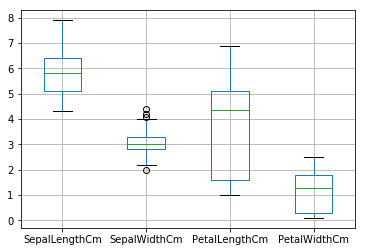

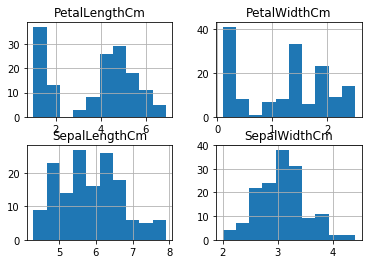

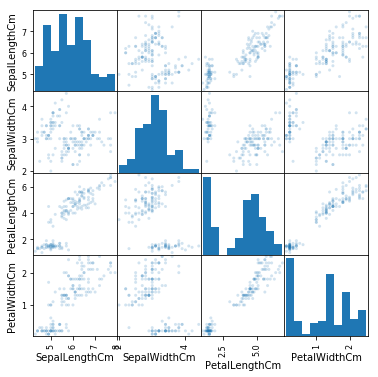

In [107]:
visualisations(dataset)

### Summary and inference of relational plots

*a) What analyses we’ve done on the data:*

**We have used three different plots to bring out the statistics and relations between the different variables within the dataset.**

   **1. Boxplot: It is a visual description of the descriptive statistics we earlier used to understand the dataset.**
   
   **2. Histogram: The histograms give a very good understanding about the general distribution of the data points and present a good chance to rectif any skewness in the data.**
   
   **3. Scatter Matrix: Scatter matix gives a good understanding of the variables' interdependence.**

*b) Inference:*

   **There are a few outliers in the SepalWidth, although it has a Normal Distribution. All the other features have some sort of skenwness and can be most easily identified in the histograms for PetalLength and PetalWidth.**
   
   

In [108]:
#Visualisations using Seaborn
#Categorical Plots
def categoricalplots(df):
    figure2,axes=plt.subplots(2,2,figsize=(12,12))
    ViolinPlot_1=sns.violinplot(x='Species',y='PetalLengthCm',
                           data=dataset,
                          ax=axes[0,0])
    ViolinPlot_2=sns.violinplot(x='Species',y='PetalWidthCm',
                           data=dataset,
                          ax=axes[0,1])
    ViolinPlot_3=sns.violinplot(x='Species',y='SepalWidthCm',
                           data=dataset,
                          ax=axes[1,1])
    ViolinPlot_4=sns.violinplot(x='Species',y='SepalLengthCm',
                           data=dataset,
                          ax=axes[1,0])
    
    figure3,axes1=plt.subplots(2,2,figsize=(12,12))
    BarPlot_1=sns.barplot(x='Species',y='PetalLengthCm',
                           data=dataset,
                          ax=axes1[0,0])
    BarPlot_2=sns.barplot(x='Species',y='PetalWidthCm',
                           data=dataset,
                          ax=axes1[0,1])
    BarPlot_3=sns.barplot(x='Species',y='SepalWidthCm',
                           data=dataset,
                          ax=axes1[1,1])
    BarPlot_4=sns.barplot(x='Species',y='SepalLengthCm',
                           data=dataset,
                          ax=axes1[1,0])
    
    return figure2,figure3
    


(<matplotlib.figure.Figure at 0x1ab704c63c8>,
 <matplotlib.figure.Figure at 0x1ab708ecf60>)

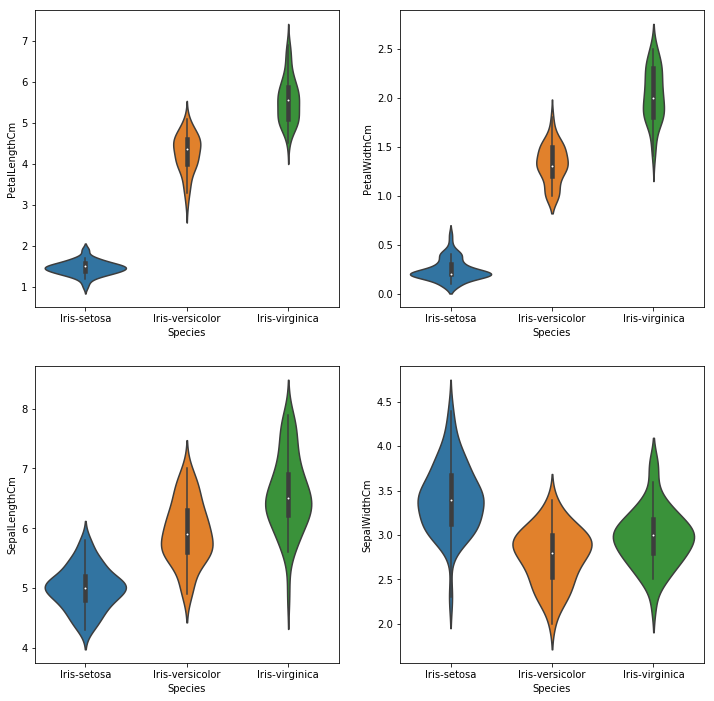

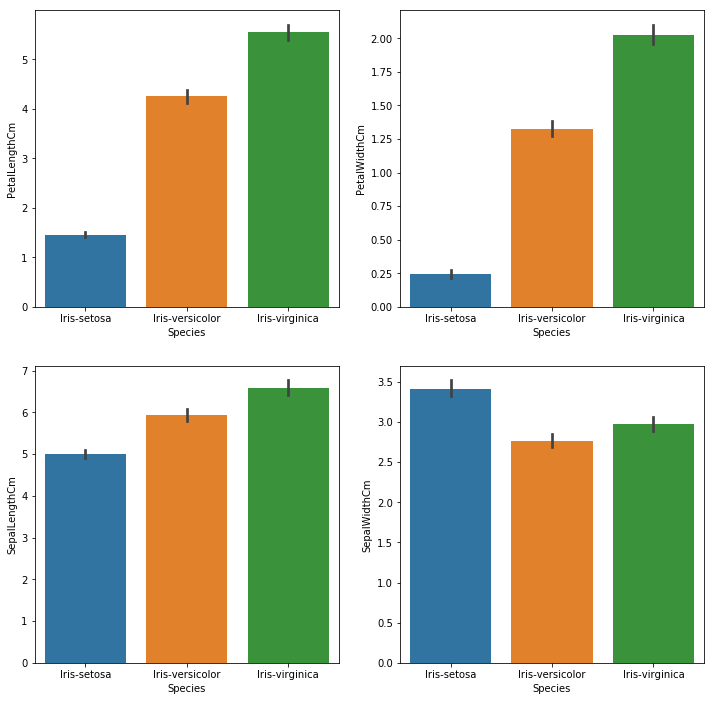

In [109]:
categoricalplots(dataset)

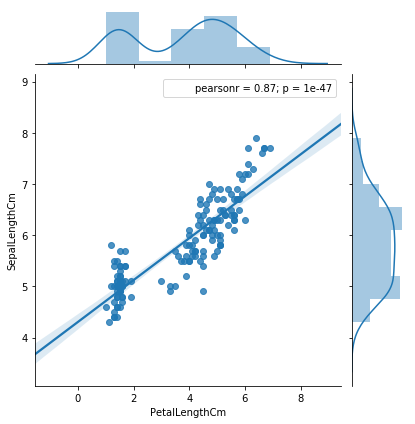

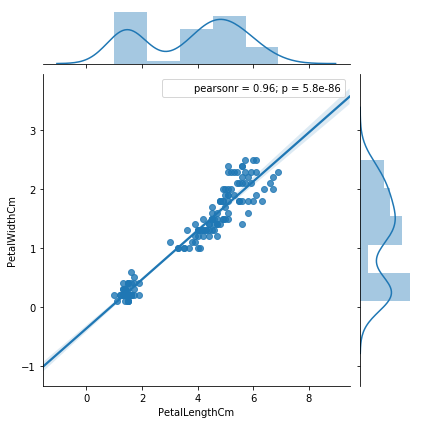

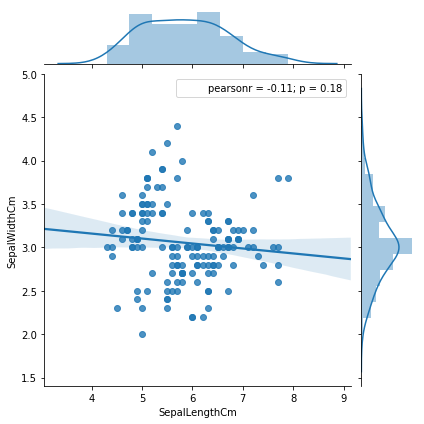

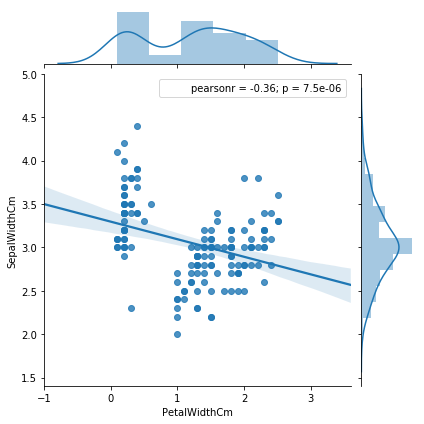

In [110]:
#Jointplots using seaborn
map1=sns.jointplot(x="PetalLengthCm",y="SepalLengthCm",data=dataset,
                  kind='reg')
map2=sns.jointplot(x="PetalLengthCm",y="PetalWidthCm",data=dataset,
                  kind='reg')
map3=sns.jointplot(x="SepalLengthCm",y="SepalWidthCm",data=dataset,
                  kind='reg')
map4=sns.jointplot(x="PetalWidthCm",y="SepalWidthCm",data=dataset,
                  kind='reg')


### Summary and inference of Categorical plots

*a) What kind of categorical plots and analyses we’ve done on the data:*

**We have used three different types of categorical plots to identify relationship between the flower species category and the flower variables**

**1. Violinplots: Such plots give a very good idea about the distribution of data points for a partiular category and also a very good visual explanation of mean, standard deviation and the spread of the data points.**

**2. BarPlots: Such plots essentially give similar outputs as the violinplots, but are much easier to read, much designed for a lessear technical audience.**

**3. Jointplots: Provide a very good way to interpret the interdependence of the variables, by means of the Pearson-Coefficient. In addition, we can plot the best-fit lines and the confidence intervals.**

*b) Inferences:*

**Violin and Bar Plots:**

*Iris-Virginica has the highest Petallength, PetalWidth and SepalLength.Although, the spread of the datapoints across values is higher as well*

*Iris-Setosa has the smallest Petallength, PetalWidth and SepalLength, with a lot of data points aggregated around the mean. Although, Iris-Setosa has the highest recorded value for SepalWidth.*

**Jointplots**

*Positive Correlation observed between **SepalLength, PetalLength** and **PetalWidth and Petallength**.*

*Negative Correlation observed between **SepalWidth, SepalLength** and **SepalWidth, PetalWidth**.*



### 2.4 Feature Engineering
<a id="Engineer"></a>

In [111]:
#Four functions to engineer new variables within the existing dataset
def featuredivision(var1,var2):
    dividedfeature=var1/var2
    return dividedfeature

def featuremultiplied(var1,var2):
    multipliedfeature=var1*var2
    return multipliedfeature

def featureadded(var1,var2):
    addedfeature=var1+var2
    return addedfeature

def featuresubtracted(var1,var2):
    subtractedfeature=var2-var1
    return subtractedfeature


In [112]:
#Engineering new features in the existing dataset.
dataset['Petalratio']=featuredivision(dataset['PetalLengthCm'],dataset['PetalWidthCm'])
dataset['Petalproduct']=featuremultiplied(dataset['PetalLengthCm'],dataset['PetalWidthCm'])
dataset['Sepalratio']=featuredivision(dataset['SepalLengthCm'],dataset['SepalWidthCm'])
dataset['Sepalproduct']=featuremultiplied(dataset['SepalLengthCm'],dataset['SepalWidthCm'])

In [115]:
#Converting the final target into binary target(0,1)
species={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':1}
dataset=dataset.replace({'Species':species})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [116]:
#Having a glimpse again at the dataset with new features
heading(dataset)
descriptivestats(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int64
Petalratio       150 non-null float64
Petalproduct     150 non-null float64
Sepalratio       150 non-null float64
Sepalproduct     150 non-null float64
dtypes: float64(8), int64(1)
memory usage: 10.6 KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Petalratio,Petalproduct,Sepalratio,Sepalproduct
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.666667,4.367166,5.793133,1.955144,17.806533
std,0.828066,0.433594,1.764420,0.763161,0.472984,2.651508,4.713499,0.398697,3.368693
min,4.300000,2.000000,1.000000,0.100000,0.000000,2.125000,0.110000,1.268293,10.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,2.802381,0.420000,1.551915,15.645000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,3.300000,5.615000,2.032292,17.660000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,4.666667,9.690000,2.224910,20.325000
max,7.900000,4.400000,6.900000,2.500000,1.000000,15.000000,15.870000,2.961538,30.020000


### 2.5 Preprocessing dataset for model creation
<a id="preprocess"></a>

In [117]:
#Dividing the existing dataset into target variable and independent variables
target_variable=dataset.iloc[:,4]
#Independent variables or X
independent_variables=dataset.iloc[:, lambda dataset:[0,1,2,3,5,6,7,8]]

In [118]:
heading(independent_variables)


(Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Petalratio', 'Petalproduct', 'Sepalratio', 'Sepalproduct'],
       dtype='object'),
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Petalratio  \
 0            5.1           3.5            1.4           0.2         7.0   
 1            4.9           3.0            1.4           0.2         7.0   
 2            4.7           3.2            1.3           0.2         6.5   
 3            4.6           3.1            1.5           0.2         7.5   
 4            5.0           3.6            1.4           0.2         7.0   
 
    Petalproduct  Sepalratio  Sepalproduct  
 0          0.28    1.457143         17.85  
 1          0.28    1.633333         14.70  
 2          0.26    1.468750         15.04  
 3          0.30    1.483871         14.26  
 4          0.28    1.388889         18.00  ,
 (150, 8))

In [120]:
target_variable

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
128    1
129    1
130    1
131    1
132    1
133    1
134    1
135    1
136    1
137    1
138    1
139    1
140    1
141    1
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int64

#### 2.5.1 Creation of dummy variables
<a id="dummies"></a>

In [32]:
def labelencoded(df):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    variable_1 = encoder.fit_transform(df) 
    encoded_dataframe=pd.DataFrame(variable_1)
    return encoded_dataframe


### Summary of Feature Engineering

*a) What kind of Feature Engineering and analyses we’ve done on the data:*

**We have used three different types of feature engneering strategies to identify relationship between the flower variables**

**1. Division of Lengths and Widths: Essentially this engineered feature will provide an understanding about the aspect ratio of the flowers. We try to answer: Is there a relation between aspect ratio and flower species?**

**2. Multiplication of lengths and widths: Again, the key idea here is to get a sense of how the multiplied dimensions correlate to the flower species.**

**3. Labelencoding: Labelencoded the Target variable (Flower species), before we input the data into a machine learning algorithm.**



### 3: DEVELOP
<a id="BaselineModel"></a>

### 3.1 Model Development
<a id="development"></a>

In [121]:
#Using cross validation to split the dataset into test and validation sets
def crossvalidate(df):
    import sklearn as sk 
    from sklearn.model_selection import KFold
    kf=KFold(n_splits=5)
    kf.get_n_splits(df)
    print(kf)
    
    print('Train Set','Test Set')
    for train_set, test_set in kf.split(df):
        return kf,train_set,test_set
    

In [122]:
split_independent_variables=crossvalidate(independent_variables)

KFold(n_splits=5, random_state=None, shuffle=False)
Train Set Test Set


In [123]:
split_target_variable=crossvalidate(target_variable)

KFold(n_splits=5, random_state=None, shuffle=False)
Train Set Test Set


In [124]:
#Creating a Baseline Classification model
def baselinemodel(X,Y):
    from sklearn.linear_model import LogisticRegression
    model_1=LogisticRegression()
    return model_1.fit(X,Y)
    

In [125]:
baselinemodel(independent_variables,target_variable)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
def prediction(model,X,Y):
    from sklearn.cross_validation import cross_val_predict
    from sklearn import metrics
    return cross_val_predict(model,X,Y,cv=5)

In [128]:
predicted_species=prediction(model_1,independent_variables,target_variable)

### 3.2 ModelTuning
<a id="tuning"></a>

### 3.3 ModelEvaluation
<a id="evaluate"></a>

In [130]:
from sklearn import metrics
# Print Confusion Matrix
print (metrics.confusion_matrix(predicted_species,target_variable))

[[ 50   0]
 [  0 100]]


In [131]:
print (metrics.classification_report(predicted_species, target_variable))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00       100

avg / total       1.00      1.00      1.00       150



### 4: DEPLOY
<a id="deploy"></a>